In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from tqdm import tqdm 

## Pre

In [382]:
df = pd.read_csv("features_50_100_filt.csv")
df 

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,C001,left,ramp,white,no,31.394663,7.330628,31.112307,46.795632,12.854402,...,6.222775,47.949744,54.710644,35.675227,19.035417,11.369135,42.452454,53.821590,-0.995919,-0.496738
1,C001,left,ramp,blue,no,55.216501,1.531317,55.227985,57.452084,52.862637,...,6.252377,51.219999,54.903867,31.493067,23.410801,3.709111,50.004771,53.713883,1.506247,-1.639840
2,C001,left,ramp,green,no,54.413234,1.266537,54.605837,55.752185,50.294484,...,3.456245,51.194921,57.635150,44.984027,12.651123,5.930505,49.193261,55.123766,-1.149759,0.138510
3,C001,left,flash,white,no,51.143455,4.231166,49.687418,57.076212,46.305057,...,7.920004,46.859924,58.301876,33.211007,25.090869,12.164597,39.358046,51.522643,-1.175331,-0.101796
4,C001,left,flash,blue,no,48.961582,3.666817,49.575101,57.306089,43.411308,...,2.960709,51.783334,56.676868,46.228285,10.448583,4.500076,49.678934,54.179010,-0.916635,-0.146403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,S020,right,flash,red,yes,47.464457,3.452431,48.845450,50.461556,37.985519,...,1.687447,49.779558,52.042778,46.972036,5.070742,3.392010,47.812960,51.204970,-1.494160,-0.124203
652,S020,right,ramp,red,yes,51.431310,0.636079,51.321317,53.695629,50.573754,...,1.714193,47.041743,50.761845,44.709128,6.052716,1.765820,45.939511,47.705331,-0.451365,0.578875
653,S020,right,flash,white,yes,50.382672,4.638326,51.780745,54.885753,38.495936,...,5.531275,50.364064,53.138309,34.932981,18.205328,5.712659,46.363168,52.075828,0.299607,-1.229694
654,S020,right,ramp,green,yes,30.495772,5.551310,31.181252,38.517663,13.563076,...,7.365816,49.290258,53.349617,29.833073,23.516543,9.242224,42.212531,51.454755,-0.221007,-1.112313


In [102]:
df.dtypes

id                         object
eye                        object
stimuli                    object
color                      object
glaucoma                   object
                           ...   
IQR_window_100_26         float64
Q1_window_100_26          float64
Q3_window_100_26          float64
kurtosis_window_100_26    float64
skewness_window_100_26    float64
Length: 907, dtype: object

In [103]:
print(df.columns.tolist())

['id', 'eye', 'stimuli', 'color', 'glaucoma', 'mean_window_50_0', 'std_window_50_0', 'median_window_50_0', 'max_window_50_0', 'min_window_50_0', 'range_window_50_0', 'IQR_window_50_0', 'Q1_window_50_0', 'Q3_window_50_0', 'kurtosis_window_50_0', 'skewness_window_50_0', 'mean_window_50_1', 'std_window_50_1', 'median_window_50_1', 'max_window_50_1', 'min_window_50_1', 'range_window_50_1', 'IQR_window_50_1', 'Q1_window_50_1', 'Q3_window_50_1', 'kurtosis_window_50_1', 'skewness_window_50_1', 'mean_window_50_2', 'std_window_50_2', 'median_window_50_2', 'max_window_50_2', 'min_window_50_2', 'range_window_50_2', 'IQR_window_50_2', 'Q1_window_50_2', 'Q3_window_50_2', 'kurtosis_window_50_2', 'skewness_window_50_2', 'mean_window_50_3', 'std_window_50_3', 'median_window_50_3', 'max_window_50_3', 'min_window_50_3', 'range_window_50_3', 'IQR_window_50_3', 'Q1_window_50_3', 'Q3_window_50_3', 'kurtosis_window_50_3', 'skewness_window_50_3', 'mean_window_50_4', 'std_window_50_4', 'median_window_50_4', '

In [104]:
# Lista de columnas adicionales que quieres conservar
#additional_columns = ['id', 'eye', 'stimuli', 'color', 'glaucoma']

# Seleccionar las columnas que van desde 50_0 hasta 50_14
#pattern_columns = [col for col in df.columns if '50_' in col and int(col.split('_')[-1]) <= 14]

# Combinar las columnas seleccionadas con las columnas adicionales
#selected_columns = additional_columns + pattern_columns

# Crear un nuevo dataframe con las columnas seleccionadas
#df_selected = df[selected_columns]

# Mostrar las primeras filas del dataframe seleccionado
#df_selected.head()

In [105]:
total_nulls = df.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {total_nulls}")

Total de valores nulos en el dataset: 0


In [106]:
# Verificar si el DataFrame tiene valores nulos
def check_nulls(dataset):
    nulls = dataset.isnull().sum()
    print("Valores nulos por columna:")
    print(nulls[nulls > 0])  # Mostrar solo las columnas con valores nulos
    return nulls[nulls > 0]

nulls = check_nulls(df)

Valores nulos por columna:
Series([], dtype: int64)


In [107]:
# Eliminar columnas que contienen cualquier valor NaN
df = df.dropna(axis=1)
nulls = check_nulls(df)

Valores nulos por columna:
Series([], dtype: int64)


In [108]:
# Eliminar columnas que contienen cualquier valor NaN
#df_selected = df_selected.dropna(axis=1)
#nulls = check_nulls(df_selected)

In [109]:
pd.set_option('future.no_silent_downcasting', True)
df = df.replace({'yes': 1, 'no': 0})

# Convertir la columna 'glaucoma' a tipo numérico
df['glaucoma'] = df['glaucoma'].astype(int)

# Verificar el tipo de dato de la columna
print(df.dtypes['glaucoma'])

int32


In [110]:
#pd.set_option('future.no_silent_downcasting', True)
#df_selected = df_selected.replace({'yes': 1, 'no': 0})

# Convertir la columna 'glaucoma' a tipo numérico
#df_selected['glaucoma'] = df_selected['glaucoma'].astype(int)

# Verificar el tipo de dato de la columna
#print(df_selected.dtypes['glaucoma'])

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tienes un dataset cargado
# dataset = pd.read_csv('path_to_your_dataset.csv')

# Primero, obtener los ids únicos
unique_ids = df['id'].unique()

# Realizar el train_test_split a nivel de id
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=26)

# Filtrar el df original usando los ids seleccionados
train_set = df[df['id'].isin(train_ids)]
test_set = df[df['id'].isin(test_ids)]

# Verifica los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {len(train_set)}")
print(f"Tamaño del conjunto de prueba: {len(test_set)}")

Tamaño del conjunto de entrenamiento: 512
Tamaño del conjunto de prueba: 144


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tienes un dataset cargado
# dataset = pd.read_csv('path_to_your_dataset.csv')

# Primero, obtener los ids únicos
#unique_ids = df_selected['id'].unique()

# Realizar el train_test_split a nivel de id
#train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

# Filtrar el df_selected original usando los ids seleccionados
#train_set = df_selected[df_selected['id'].isin(train_ids)]
#test_set = df_selected[df_selected['id'].isin(test_ids)]

# Verifica los tamaños de los conjuntos
#print(f"Tamaño del conjunto de entrenamiento: {len(train_set)}")
#print(f"Tamaño del conjunto de prueba: {len(test_set)}")

In [113]:
y_train = train_set.loc[:, 'glaucoma']
y_test = test_set.loc[:, 'glaucoma']
labels = df.loc[:, 'glaucoma']

In [114]:
print(y_train)
print(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
651    1
652    1
653    1
654    1
655    1
Name: glaucoma, Length: 512, dtype: int32
80     0
81     0
82     0
83     0
84     0
      ..
635    1
636    1
637    1
638    1
639    1
Name: glaucoma, Length: 144, dtype: int32


In [115]:
# distribución original
labels.value_counts() / labels.count() * 100

glaucoma
0    51.219512
1    48.780488
Name: count, dtype: float64

In [116]:
# conjunto de entrenamiento
y_train.value_counts() / y_train.count() * 100

glaucoma
0    50.0
1    50.0
Name: count, dtype: float64

In [117]:
# conjunto de pruebas
y_test.value_counts() / y_test.count() * 100

glaucoma
0    55.555556
1    44.444444
Name: count, dtype: float64

In [118]:
df 

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,C001,left,ramp,white,0,31.394663,7.330628,31.112307,46.795632,12.854402,...,6.222775,47.949744,54.710644,35.675227,19.035417,11.369135,42.452454,53.821590,-0.995919,-0.496738
1,C001,left,ramp,blue,0,55.216501,1.531317,55.227985,57.452084,52.862637,...,6.252377,51.219999,54.903867,31.493067,23.410801,3.709111,50.004771,53.713883,1.506247,-1.639840
2,C001,left,ramp,green,0,54.413234,1.266537,54.605837,55.752185,50.294484,...,3.456245,51.194921,57.635150,44.984027,12.651123,5.930505,49.193261,55.123766,-1.149759,0.138510
3,C001,left,flash,white,0,51.143455,4.231166,49.687418,57.076212,46.305057,...,7.920004,46.859924,58.301876,33.211007,25.090869,12.164597,39.358046,51.522643,-1.175331,-0.101796
4,C001,left,flash,blue,0,48.961582,3.666817,49.575101,57.306089,43.411308,...,2.960709,51.783334,56.676868,46.228285,10.448583,4.500076,49.678934,54.179010,-0.916635,-0.146403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,S020,right,flash,red,1,47.464457,3.452431,48.845450,50.461556,37.985519,...,1.687447,49.779558,52.042778,46.972036,5.070742,3.392010,47.812960,51.204970,-1.494160,-0.124203
652,S020,right,ramp,red,1,51.431310,0.636079,51.321317,53.695629,50.573754,...,1.714193,47.041743,50.761845,44.709128,6.052716,1.765820,45.939511,47.705331,-0.451365,0.578875
653,S020,right,flash,white,1,50.382672,4.638326,51.780745,54.885753,38.495936,...,5.531275,50.364064,53.138309,34.932981,18.205328,5.712659,46.363168,52.075828,0.299607,-1.229694
654,S020,right,ramp,green,1,30.495772,5.551310,31.181252,38.517663,13.563076,...,7.365816,49.290258,53.349617,29.833073,23.516543,9.242224,42.212531,51.454755,-0.221007,-1.112313


In [119]:
df.dtypes

id                         object
eye                        object
stimuli                    object
color                      object
glaucoma                    int32
                           ...   
IQR_window_100_26         float64
Q1_window_100_26          float64
Q3_window_100_26          float64
kurtosis_window_100_26    float64
skewness_window_100_26    float64
Length: 907, dtype: object

In [120]:
# Hacer copias de train_set y test_set sin las columnas 'id' y 'glaucoma'
X_train = train_set.drop(columns=['id', 'glaucoma']).copy()
X_test = test_set.drop(columns=['id', 'glaucoma']).copy()

# Verifica los resultados
X_train.head()
X_test.head()

,eye,stimuli,color,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
80,left,flash,white,47.876120,1.215420,48.238995,49.065296,44.677490,4.387806,0.838029,...,1.364572,47.204567,49.136848,44.202053,4.934795,1.912506,45.996367,47.908874,-0.669781,-0.373118
81,left,ramp,blue,48.764594,0.434933,48.599071,49.552706,48.303419,1.249287,0.748752,...,3.358887,48.315399,49.542053,39.403663,10.138390,4.935315,43.766267,48.701582,-0.704639,-0.926468
82,left,ramp,green,43.539460,5.093359,43.281815,49.973349,36.309982,13.663367,10.280480,...,0.583209,47.789604,48.492969,45.867118,2.625851,0.613619,47.465382,48.079002,0.875698,-1.023360
83,left,flash,blue,44.304749,5.384362,44.058093,51.127549,36.677103,14.450446,11.303374,...,2.546048,48.678461,50.177847,41.745821,8.432026,1.928831,47.297015,49.225846,0.072630,-1.255990
84,left,ramp,red,48.404555,0.534434,48.485686,49.160349,47.573558,1.586792,0.986345,...,1.535656,40.459940,42.980234,38.483692,4.496542,3.109657,39.150080,42.259738,-1.644117,0.161329


In [121]:
numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

In [122]:
print(categorical)

Index(['eye', 'stimuli', 'color'], dtype='object')


In [123]:
print(numeric)

Index(['mean_window_50_0', 'std_window_50_0', 'median_window_50_0',
       'max_window_50_0', 'min_window_50_0', 'range_window_50_0',
       'IQR_window_50_0', 'Q1_window_50_0', 'Q3_window_50_0',
       'kurtosis_window_50_0',
       ...
       'std_window_100_26', 'median_window_100_26', 'max_window_100_26',
       'min_window_100_26', 'range_window_100_26', 'IQR_window_100_26',
       'Q1_window_100_26', 'Q3_window_100_26', 'kurtosis_window_100_26',
       'skewness_window_100_26'],
      dtype='object', length=902)


In [124]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir las columnas numéricas y categóricas
numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

# Pipelines para columnas numéricas y categóricas
numeric_transformations = Pipeline([
    ('scaler', MinMaxScaler())  # Escalado MinMax para columnas numéricas
])

categoric_transformations = Pipeline([
    ('category_one_hot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))  # Codificación OneHot para categóricas
])

# Preprocessor: combinación de los pipelines numéricos y categóricos
preprocessor = ColumnTransformer(transformers=[
    ('numerical', numeric_transformations, numeric),
    ('categorical', categoric_transformations, categorical)
])

In [125]:
# Aplicar el preprocessor (ajustar y transformar el conjunto de entrenamiento)
X_train_transformed = preprocessor.fit_transform(X_train)

# Obtener las categorías nuevas creadas por el OneHotEncoder
onehot_columns = preprocessor.named_transformers_['categorical'].named_steps['category_one_hot'].get_feature_names_out(categorical)

# Crear las columnas finales: numéricas + categóricas codificadas
final_columns = list(numeric) + list(onehot_columns)

# Convertir los datos transformados en un DataFrame para visualizar
X_train_trans = pd.DataFrame(X_train_transformed, columns=final_columns)

# Ver las primeras filas del DataFrame transformado
X_train_trans.head()

,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,Q1_window_50_0,Q3_window_50_0,kurtosis_window_50_0,...,kurtosis_window_100_26,skewness_window_100_26,eye_left,eye_right,stimuli_flash,stimuli_ramp,color_blue,color_green,color_red,color_white
0,0.397068,0.580909,0.392106,0.527394,0.065959,0.684835,0.169115,0.361473,0.425043,0.290706,...,0.055323,0.468024,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.839182,0.121342,0.839991,0.680135,0.801298,0.092594,0.117226,0.816053,0.843438,0.042331,...,0.241393,0.258054,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.824274,0.100359,0.828437,0.655770,0.754096,0.110113,0.042309,0.823882,0.818151,0.540852,...,0.043883,0.584708,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.763589,0.335292,0.737090,0.674748,0.680772,0.217325,0.368261,0.691647,0.832893,0.007861,...,0.041981,0.540568,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.723096,0.290570,0.735004,0.678042,0.627586,0.280351,0.275040,0.660832,0.762068,0.084632,...,0.061218,0.532375,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [126]:
# Aplicar el preprocessor (ajustar y transformar el conjunto de entrenamiento)
X_test_transformed = preprocessor.fit_transform(X_test)

# Obtener las categorías nuevas creadas por el OneHotEncoder
onehot_columns = preprocessor.named_transformers_['categorical'].named_steps['category_one_hot'].get_feature_names_out(categorical)

# Crear las columnas finales: numéricas + categóricas codificadas
final_columns = list(numeric) + list(onehot_columns)

# Convertir los datos transformados en un DataFrame para visualizar
X_test_trans = pd.DataFrame(X_test_transformed, columns=final_columns)

# Ver las primeras filas del DataFrame transformado
X_test_trans.head()

,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,Q1_window_50_0,Q3_window_50_0,kurtosis_window_50_0,...,kurtosis_window_100_26,skewness_window_100_26,eye_left,eye_right,stimuli_flash,stimuli_ramp,color_blue,color_green,color_red,color_white
0,0.659979,0.085511,0.648738,0.548093,0.694304,0.072631,0.030235,0.706828,0.591886,0.503858,...,0.157678,0.476571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.681114,0.028306,0.656642,0.559253,0.766610,0.019099,0.026574,0.719959,0.602857,0.127586,...,0.152532,0.338508,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.556819,0.369738,0.539924,0.568883,0.527447,0.230838,0.417349,0.487016,0.595381,0.010855,...,0.385806,0.314333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.575024,0.391067,0.556964,0.595309,0.534768,0.244263,0.459285,0.498731,0.631129,0.017219,...,0.267265,0.256291,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.672549,0.035599,0.654153,0.550270,0.752055,0.024856,0.036315,0.708381,0.596925,0.058581,...,0.013856,0.609919,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [127]:
X_train.head()

,eye,stimuli,color,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,left,ramp,white,31.394663,7.330628,31.112307,46.795632,12.854402,33.941230,4.109362,...,6.222775,47.949744,54.710644,35.675227,19.035417,11.369135,42.452454,53.821590,-0.995919,-0.496738
1,left,ramp,blue,55.216501,1.531317,55.227985,57.452084,52.862637,4.589447,2.848524,...,6.252377,51.219999,54.903867,31.493067,23.410801,3.709111,50.004771,53.713883,1.506247,-1.639840
2,left,ramp,green,54.413234,1.266537,54.605837,55.752185,50.294484,5.457700,1.028158,...,3.456245,51.194921,57.635150,44.984027,12.651123,5.930505,49.193261,55.123766,-1.149759,0.138510
3,left,flash,white,51.143455,4.231166,49.687418,57.076212,46.305057,10.771155,8.948320,...,7.920004,46.859924,58.301876,33.211007,25.090869,12.164597,39.358046,51.522643,-1.175331,-0.101796
4,left,flash,blue,48.961582,3.666817,49.575101,57.306089,43.411308,13.894781,6.683184,...,2.960709,51.783334,56.676868,46.228285,10.448583,4.500076,49.678934,54.179010,-0.916635,-0.146403


In [128]:
total_nulls = X_train.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {total_nulls}")

Total de valores nulos en el dataset: 0


In [129]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

def plot_training(model, X_test, y_test):
    y_pred = model.predict(X_test)
    predictions = [round(value, 2) for value in y_pred]

    # Evaluamos los modelos
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    results = model.evals_result()
    epochs = len(results['validation_0']['error'])

    # Log Loss Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['logloss'],
                             mode='lines', name='Train Log Loss'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['logloss'],
                             mode='lines', name='Test Log Loss'))
    fig.update_layout(title='XGBoost Log Loss Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Log Loss',
                      legend_title='Dataset')
    fig.show()

    # Classification Error Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['error'],
                             mode='lines', name='Train Error'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['error'],
                             mode='lines', name='Test Error'))
    fig.update_layout(title='XGBoost Classification Error Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Classification Error',
                      legend_title='Dataset')
    fig.show()

## Pre select

In [362]:
df = pd.read_csv("features_50_100_filt.csv")
df 

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,C001,left,ramp,white,no,31.394663,7.330628,31.112307,46.795632,12.854402,...,6.222775,47.949744,54.710644,35.675227,19.035417,11.369135,42.452454,53.821590,-0.995919,-0.496738
1,C001,left,ramp,blue,no,55.216501,1.531317,55.227985,57.452084,52.862637,...,6.252377,51.219999,54.903867,31.493067,23.410801,3.709111,50.004771,53.713883,1.506247,-1.639840
2,C001,left,ramp,green,no,54.413234,1.266537,54.605837,55.752185,50.294484,...,3.456245,51.194921,57.635150,44.984027,12.651123,5.930505,49.193261,55.123766,-1.149759,0.138510
3,C001,left,flash,white,no,51.143455,4.231166,49.687418,57.076212,46.305057,...,7.920004,46.859924,58.301876,33.211007,25.090869,12.164597,39.358046,51.522643,-1.175331,-0.101796
4,C001,left,flash,blue,no,48.961582,3.666817,49.575101,57.306089,43.411308,...,2.960709,51.783334,56.676868,46.228285,10.448583,4.500076,49.678934,54.179010,-0.916635,-0.146403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,S020,right,flash,red,yes,47.464457,3.452431,48.845450,50.461556,37.985519,...,1.687447,49.779558,52.042778,46.972036,5.070742,3.392010,47.812960,51.204970,-1.494160,-0.124203
652,S020,right,ramp,red,yes,51.431310,0.636079,51.321317,53.695629,50.573754,...,1.714193,47.041743,50.761845,44.709128,6.052716,1.765820,45.939511,47.705331,-0.451365,0.578875
653,S020,right,flash,white,yes,50.382672,4.638326,51.780745,54.885753,38.495936,...,5.531275,50.364064,53.138309,34.932981,18.205328,5.712659,46.363168,52.075828,0.299607,-1.229694
654,S020,right,ramp,green,yes,30.495772,5.551310,31.181252,38.517663,13.563076,...,7.365816,49.290258,53.349617,29.833073,23.516543,9.242224,42.212531,51.454755,-0.221007,-1.112313


In [363]:
df = df[df['stimuli'] == 'ramp']
df.head()

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,C001,left,ramp,white,no,31.394663,7.330628,31.112307,46.795632,12.854402,...,6.222775,47.949744,54.710644,35.675227,19.035417,11.369135,42.452454,53.821590,-0.995919,-0.496738
1,C001,left,ramp,blue,no,55.216501,1.531317,55.227985,57.452084,52.862637,...,6.252377,51.219999,54.903867,31.493067,23.410801,3.709111,50.004771,53.713883,1.506247,-1.639840
2,C001,left,ramp,green,no,54.413234,1.266537,54.605837,55.752185,50.294484,...,3.456245,51.194921,57.635150,44.984027,12.651123,5.930505,49.193261,55.123766,-1.149759,0.138510
5,C001,left,ramp,red,no,53.330861,1.338978,53.020281,56.593690,51.774765,...,2.103447,54.005639,55.880778,48.865336,7.015442,3.805166,51.213333,55.018499,-1.064306,-0.620778
8,C001,right,ramp,white,no,37.425386,6.175048,36.633445,46.983299,29.410794,...,3.398165,45.137282,50.264497,39.896611,10.367887,6.788679,42.203082,48.991762,-1.200749,0.020192


### Primeras ventanas

In [215]:
import pandas as pd

def select_first_X_windows(dataset, X, window_size):
    """
    Selecciona las primeras `X` ventanas de un dataset para un tamaño de ventana específico.

    Parameters:
    - dataset: El DataFrame que contiene las ventanas.
    - X: El número de ventanas que se desean seleccionar.
    - window_size: El tamaño de las ventanas (por ejemplo, 50, 100).

    Returns:
    - Un nuevo DataFrame con las primeras `X` ventanas seleccionadas.
    """
    # Definir las columnas adicionales que quieres conservar
    additional_columns = ['id', 'eye', 'stimuli', 'color', 'glaucoma']

    # Seleccionar las columnas de las primeras X ventanas para el tamaño de ventana proporcionado
    window_columns = [col for col in dataset.columns if f'window_{window_size}_' in col]
    selected_columns = [col for col in window_columns if int(col.split('_')[-1]) < X]
    
    # Crear un nuevo DataFrame con las columnas adicionales y las ventanas seleccionadas
    selected_columns = additional_columns + selected_columns
    new_dataset = dataset[selected_columns]
    
    return new_dataset

In [222]:
df = select_first_X_windows(df, X=40, window_size=15)
df.head()

,id,eye,stimuli,color,glaucoma,mean_window_15_0,std_window_15_0,median_window_15_0,max_window_15_0,min_window_15_0,...,std_window_15_39,median_window_15_39,max_window_15_39,min_window_15_39,range_window_15_39,IQR_window_15_39,Q1_window_15_39,Q3_window_15_39,kurtosis_window_15_39,skewness_window_15_39
3,C001,left,flash,white,no,56.632651,0.458454,56.778895,57.076212,55.474919,...,0.461397,50.252934,51.252066,49.888643,1.363423,0.791180,49.955469,50.746649,-1.144847,0.534356
4,C001,left,flash,blue,no,48.552823,4.433509,47.394051,57.306089,43.467695,...,0.471252,50.121698,50.465325,48.976720,1.488605,0.689186,49.668317,50.357503,-0.698355,-0.761167
6,C001,left,flash,red,no,52.821906,1.120936,52.632349,54.856749,51.386691,...,1.289798,48.986172,50.294015,46.252600,4.041416,2.094491,47.745725,49.840217,-1.073131,-0.472739
7,C001,left,flash,green,no,52.349905,2.369912,51.811916,56.845262,49.527714,...,0.379407,49.677224,50.548975,49.399779,1.149195,0.623849,49.443869,50.067718,-0.957793,0.633952
11,C001,right,flash,white,no,49.792820,2.323190,49.630205,53.710995,46.398926,...,0.244736,44.951446,45.533717,44.739600,0.794117,0.388677,44.810140,45.198817,-0.854775,0.578963


In [110]:
def select_windows_by_size(dataset, X, Y):
    """
    Selecciona `X` ventanas del tamaño 50 y `Y` ventanas del tamaño 100.

    Parameters:
    - dataset: El DataFrame que contiene las ventanas.
    - X: El número de ventanas del tamaño 50 que se desean seleccionar.
    - Y: El número de ventanas del tamaño 100 que se desean seleccionar.

    Returns:
    - Un nuevo DataFrame con las primeras `X` ventanas de 50 y las primeras `Y` ventanas de 100.
    """
    # Definir las columnas adicionales que quieres conservar
    additional_columns = ['id', 'eye', 'stimuli', 'color', 'glaucoma']

    # Seleccionar las columnas de las primeras X ventanas de tamaño 50
    window_50_columns = [col for col in dataset.columns if 'window_50_' in col]
    selected_50_columns = [col for col in window_50_columns if int(col.split('_')[-1]) < X]

    # Seleccionar las columnas de las primeras Y ventanas de tamaño 100
    window_100_columns = [col for col in dataset.columns if 'window_100_' in col]
    selected_100_columns = [col for col in window_100_columns if int(col.split('_')[-1]) < Y]

    # Crear un nuevo DataFrame con las columnas adicionales y las ventanas seleccionadas
    selected_columns = additional_columns + selected_50_columns + selected_100_columns
    new_dataset = dataset[selected_columns]

    return new_dataset

In [234]:
df = select_windows_by_size(df, X=12, Y=6)
df.head()

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,std_window_100_5,median_window_100_5,max_window_100_5,min_window_100_5,range_window_100_5,IQR_window_100_5,Q1_window_100_5,Q3_window_100_5,kurtosis_window_100_5,skewness_window_100_5
3,C001,left,flash,white,no,51.143455,4.231166,49.687418,57.076212,46.305057,...,1.280723,51.041512,52.907680,48.909258,3.998422,2.566207,49.712646,52.278854,-1.578348,0.017710
4,C001,left,flash,blue,no,48.961582,3.666817,49.575101,57.306089,43.411308,...,4.131687,41.358692,50.465325,36.698130,13.767195,3.558191,40.065652,43.623843,-0.563286,0.757384
6,C001,left,flash,red,no,52.813687,1.083558,52.826775,54.856749,50.974917,...,5.157692,47.632295,53.243709,38.529020,14.714689,10.096219,41.543645,51.639863,-1.440465,-0.237711
7,C001,left,flash,green,no,52.774836,2.086851,53.213091,56.845262,49.490746,...,4.604590,49.409601,51.574492,33.713481,17.861011,5.339434,44.908458,50.247892,1.491787,-1.500786
11,C001,right,flash,white,no,47.682086,2.183380,47.430035,53.710995,43.747661,...,1.173045,45.278153,47.042665,42.597588,4.445077,1.271354,44.570240,45.841594,-0.426246,-0.458388


### Ventanas random

In [120]:
import pandas as pd
import random

def select_random_X_windows(dataset, X, window_size, random_state=None):
    """
    Selecciona `X` ventanas aleatorias completas de un dataset para un tamaño de ventana específico.
    Cada ventana incluye todas sus características (mean, std, median, etc.).

    Parameters:
    - dataset: El DataFrame que contiene las ventanas.
    - X: El número de ventanas que se desean seleccionar.
    - window_size: El tamaño de las ventanas (por ejemplo, 50, 100).
    - random_state: Semilla para asegurar la reproducibilidad de los resultados.

    Returns:
    - Un nuevo DataFrame con `X` ventanas aleatorias seleccionadas.
    """
    # Definir las columnas adicionales que quieres conservar
    additional_columns = ['id', 'eye', 'stimuli', 'color', 'glaucoma']

    # Seleccionar las ventanas del tamaño `window_size`, agrupando características
    # Esto seleccionará ventanas con características como mean_window_50_X, std_window_50_X, etc.
    window_columns = [col for col in dataset.columns if f'window_{window_size}_' in col]
    
    # Obtener los números únicos de las ventanas (X en "window_size_X")
    unique_windows = sorted(set([col.split(f'window_{window_size}_')[1].split('_')[0] for col in window_columns]))

    # Generar una semilla si se proporciona
    if random_state is not None:
        random.seed(random_state)

    # Seleccionar aleatoriamente `X` ventanas completas
    selected_windows = random.sample(unique_windows, X)
    
    # Obtener todas las columnas asociadas a las ventanas seleccionadas
    selected_columns = [col for col in window_columns if any(f'window_{window_size}_{window}' in col for window in selected_windows)]
    
    # Crear un nuevo DataFrame con las columnas adicionales y las ventanas seleccionadas
    selected_columns = additional_columns + selected_columns
    new_dataset = dataset[selected_columns]
    
    return new_dataset

In [145]:
df = select_random_X_windows(df, X=24, window_size=25, random_state=42)
df.head()

,id,eye,stimuli,color,glaucoma,mean_window_25_7,std_window_25_7,median_window_25_7,max_window_25_7,min_window_25_7,...,std_window_25_108,median_window_25_108,max_window_25_108,min_window_25_108,range_window_25_108,IQR_window_25_108,Q1_window_25_108,Q3_window_25_108,kurtosis_window_25_108,skewness_window_25_108
0,C001,left,ramp,white,no,54.334104,2.745969,54.332386,58.260301,50.637293,...,0.850185,43.887328,44.862152,41.488805,3.373347,1.164053,43.407691,44.571744,0.565899,-0.921095
1,C001,left,ramp,blue,no,52.142525,7.013445,54.192489,59.611258,38.626061,...,0.651330,55.060787,55.335545,53.229778,2.105767,0.895674,54.360701,55.256376,-0.308979,-1.023078
2,C001,left,ramp,green,no,50.972305,0.431142,50.912664,51.917825,50.431566,...,1.487357,53.758064,56.631850,52.570949,4.060901,2.805659,52.833117,55.638776,-1.429716,0.400917
3,C001,left,flash,white,no,56.402833,2.496514,57.679925,58.622011,50.838466,...,0.953735,54.541612,57.087265,53.852462,3.234804,1.199696,54.051863,55.251559,-0.276386,0.916211
4,C001,left,flash,blue,no,53.043920,0.923062,53.366698,54.107531,51.139761,...,2.647976,55.798756,57.957846,49.213515,8.744331,3.576086,53.721995,57.298081,-0.550619,-0.794385


In [150]:
def select_random_windows_by_size(dataset, X, Y, random_state=None):
    """
    Selecciona `X` ventanas aleatorias del tamaño 50 y `Y` ventanas aleatorias del tamaño 100.
    Cada ventana incluye todas sus características (mean, std, median, etc.).

    Parameters:
    - dataset: El DataFrame que contiene las ventanas.
    - X: El número de ventanas del tamaño 50 que se desean seleccionar.
    - Y: El número de ventanas del tamaño 100 que se desean seleccionar.
    - random_state: Semilla para asegurar la reproducibilidad de los resultados.

    Returns:
    - Un nuevo DataFrame con `X` ventanas aleatorias de tamaño 50 y `Y` ventanas aleatorias de tamaño 100.
    """
    # Definir las columnas adicionales que quieres conservar
    additional_columns = ['id', 'eye', 'stimuli', 'color', 'glaucoma']

    # Seleccionar las ventanas del tamaño 50
    window_50_columns = [col for col in dataset.columns if 'window_50_' in col]
    unique_windows_50 = sorted(set([col.split('window_50_')[1].split('_')[0] for col in window_50_columns]))

    # Seleccionar las ventanas del tamaño 100
    window_100_columns = [col for col in dataset.columns if 'window_100_' in col]
    unique_windows_100 = sorted(set([col.split('window_100_')[1].split('_')[0] for col in window_100_columns]))

    # Generar una semilla si se proporciona
    if random_state is not None:
        random.seed(random_state)

    # Seleccionar aleatoriamente `X` ventanas de tamaño 50
    selected_windows_50 = random.sample(unique_windows_50, X)

    # Seleccionar aleatoriamente `Y` ventanas de tamaño 100
    selected_windows_100 = random.sample(unique_windows_100, Y)

    # Obtener todas las columnas asociadas a las ventanas seleccionadas
    selected_50_columns = [col for col in window_50_columns if any(f'window_50_{window}' in col for window in selected_windows_50)]
    selected_100_columns = [col for col in window_100_columns if any(f'window_100_{window}' in col for window in selected_windows_100)]

    # Crear un nuevo DataFrame con las columnas adicionales y las ventanas seleccionadas
    selected_columns = additional_columns + selected_50_columns + selected_100_columns
    new_dataset = dataset[selected_columns]

    return new_dataset

In [156]:
df = select_random_windows_by_size(df, X=12, Y=6, random_state=42)
df.head()

,id,eye,stimuli,color,glaucoma,mean_window_50_1,std_window_50_1,median_window_50_1,max_window_50_1,min_window_50_1,...,std_window_100_25,median_window_100_25,max_window_100_25,min_window_100_25,range_window_100_25,IQR_window_100_25,Q1_window_100_25,Q3_window_100_25,kurtosis_window_100_25,skewness_window_100_25
0,C001,left,ramp,white,no,50.015576,2.384216,48.970497,54.206701,47.052866,...,4.323273,51.041187,55.242275,40.708053,14.534222,5.233654,47.757018,52.990672,-0.394788,-0.833734
1,C001,left,ramp,blue,no,51.562557,2.868739,52.835800,54.082983,44.530508,...,7.415040,49.910601,52.468550,30.468898,21.999652,7.949140,43.212249,51.161389,-0.158115,-1.218990
2,C001,left,ramp,green,no,51.844534,2.532979,52.987521,54.401046,47.949779,...,4.025690,52.693154,54.001658,43.818740,10.182918,8.550392,44.863191,53.413584,-1.628375,-0.457180
3,C001,left,flash,white,no,52.636665,3.018751,53.169209,56.316952,48.275216,...,3.739602,51.422996,56.616758,38.349564,18.267194,5.387837,49.373148,54.760985,1.596453,-1.001072
4,C001,left,flash,blue,no,45.666377,3.745835,45.784075,52.543380,40.419639,...,1.933265,52.944257,55.646179,49.324640,6.321539,3.032850,51.427583,54.460432,-1.016299,-0.379629


### Proce

In [359]:
# Verificar si el DataFrame tiene valores nulos
def check_nulls(dataset):
    nulls = dataset.isnull().sum()
    print("Valores nulos por columna:")
    print(nulls[nulls > 0])  # Mostrar solo las columnas con valores nulos
    return nulls[nulls > 0]

nulls = check_nulls(df)

# Eliminar columnas que contienen cualquier valor NaN
df = df.dropna(axis=1)
nulls = check_nulls(df)

pd.set_option('future.no_silent_downcasting', True)
df = df.replace({'yes': 1, 'no': 0})

# Convertir la columna 'glaucoma' a tipo numérico
df['glaucoma'] = df['glaucoma'].astype(int)

# Verificar el tipo de dato de la columna
print(df.dtypes['glaucoma'])

import pandas as pd
from sklearn.model_selection import train_test_split

# Primero, obtener los ids únicos
unique_ids = df['id'].unique()

# Realizar el train_test_split a nivel de id
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=26)

# Filtrar el df original usando los ids seleccionados
train_set = df[df['id'].isin(train_ids)]
test_set = df[df['id'].isin(test_ids)]

# Verifica los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {len(train_set)}")
print(f"Tamaño del conjunto de prueba: {len(test_set)}")

y_train = train_set.loc[:, 'glaucoma']
y_test = test_set.loc[:, 'glaucoma']
labels = df.loc[:, 'glaucoma']

# Hacer copias de train_set y test_set sin las columnas 'id' y 'glaucoma'
X_train = train_set.drop(columns=['id', 'glaucoma']).copy()
X_test = test_set.drop(columns=['id', 'glaucoma']).copy()

numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir las columnas numéricas y categóricas
numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

# Pipelines para columnas numéricas y categóricas
numeric_transformations = Pipeline([
    ('scaler', MinMaxScaler())  # Escalado MinMax para columnas numéricas
])

categoric_transformations = Pipeline([
    ('category_one_hot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))  # Codificación OneHot para categóricas
])

# Preprocessor: combinación de los pipelines numéricos y categóricos
preprocessor = ColumnTransformer(transformers=[
    ('numerical', numeric_transformations, numeric),
    ('categorical', categoric_transformations, categorical)
])

Valores nulos por columna:
Series([], dtype: int64)
Valores nulos por columna:
Series([], dtype: int64)
int32
Tamaño del conjunto de entrenamiento: 256
Tamaño del conjunto de prueba: 72


In [360]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

def plot_training(model, X_test, y_test):
    y_pred = model.predict(X_test)
    predictions = [round(value, 2) for value in y_pred]

    # Evaluamos los modelos
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    results = model.evals_result()
    epochs = len(results['validation_0']['error'])

    # Log Loss Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['logloss'],
                             mode='lines', name='Train Log Loss'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['logloss'],
                             mode='lines', name='Test Log Loss'))
    fig.update_layout(title='XGBoost Log Loss Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Log Loss',
                      legend_title='Dataset')
    fig.show()

    # Classification Error Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['error'],
                             mode='lines', name='Train Error'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['error'],
                             mode='lines', name='Test Error'))
    fig.update_layout(title='XGBoost Classification Error Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Classification Error',
                      legend_title='Dataset')
    fig.show()

### Proce data augmentation

In [364]:
# Verificar si el DataFrame tiene valores nulos
def check_nulls(dataset):
    nulls = dataset.isnull().sum()
    print("Valores nulos por columna:")
    print(nulls[nulls > 0])  # Mostrar solo las columnas con valores nulos
    return nulls[nulls > 0]

nulls = check_nulls(df)

# Eliminar columnas que contienen cualquier valor NaN
df = df.dropna(axis=1)
nulls = check_nulls(df)

pd.set_option('future.no_silent_downcasting', True)
df = df.replace({'yes': 1, 'no': 0})

# Convertir la columna 'glaucoma' a tipo numérico
df['glaucoma'] = df['glaucoma'].astype(int)

# Verificar el tipo de dato de la columna
print(df.dtypes['glaucoma'])

import pandas as pd
from sklearn.model_selection import train_test_split

# Primero, obtener los ids únicos
unique_ids = df['id'].unique()

# Realizar el train_test_split a nivel de id
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=26)

# Filtrar el df original usando los ids seleccionados
train_set = df[df['id'].isin(train_ids)]
test_set = df[df['id'].isin(test_ids)]

# Verifica los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {len(train_set)}")
print(f"Tamaño del conjunto de prueba: {len(test_set)}")

y_train = train_set.loc[:, 'glaucoma']
y_test = test_set.loc[:, 'glaucoma']
labels = df.loc[:, 'glaucoma']

# Hacer copias de train_set y test_set sin las columnas 'id' y 'glaucoma'
X_train = train_set.drop(columns=['id', 'glaucoma']).copy()
X_test = test_set.drop(columns=['id', 'glaucoma']).copy()

import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

def add_noise(X, noise_level=0.01, random_seed=None):
    """
    Función para añadir ruido a las columnas numéricas con opción de semilla.
    
    Parameters:
    - X: DataFrame original.
    - noise_level: Nivel de ruido a añadir.
    - random_seed: Semilla para el generador aleatorio para reproducibilidad.
    
    Returns:
    - X_noisy: DataFrame con el ruido añadido a las columnas numéricas.
    """
    if random_seed is not None:
        np.random.seed(random_seed)  # Fijar la semilla para reproducibilidad

    X_noisy = X.copy()  # Copiar el dataset original para no modificarlo directamente
    
    for col in X.columns:
        if X[col].dtype in ["float64", "int32"]:
            noise = np.random.normal(loc=0, scale=noise_level, size=len(X))
            X_noisy[col] += X[col] * noise  # Añadir ruido

    return X_noisy


# Función para aumentar el dataset
def augment_dataset_with_labels(X, y, noise_level=0.01, num_copies=2, random_seed=None):
    """
    Aumenta el dataset generando copias con ruido y duplicando las etiquetas.
    
    Parameters:
    - X: DataFrame original (sin las etiquetas).
    - y: Series o DataFrame con las etiquetas.
    - noise_level: Nivel de ruido a añadir.
    - num_copies: Número de copias aumentadas a generar.
    - random_seed: Semilla para el generador aleatorio para reproducibilidad.
    
    Returns:
    - X_augmented: DataFrame aumentado con las copias originales y ruidosas.
    - y_augmented: Series o DataFrame con las etiquetas duplicadas.
    """
    augmented_data = [X]  # Empezar con el dataset original
    augmented_labels = [y]  # Empezar con las etiquetas originales
    
    for i in range(num_copies):
        seed = random_seed + i if random_seed is not None else None  # Variar la semilla en cada copia
        augmented_data.append(add_noise(X, noise_level, random_seed=seed))  # Añadir copias con ruido
        augmented_labels.append(y)  # Duplicar las etiquetas para cada copia
    
    X_augmented = pd.concat(augmented_data, ignore_index=True)
    y_augmented = pd.concat(augmented_labels, ignore_index=True)
    
    return X_augmented, y_augmented



# Aumentar tanto los datos como las etiquetas (ejemplo con 2 copias adicionales)
X_train_augmented, y_train_augmented = augment_dataset_with_labels(X_train, y_train, noise_level=0.01, num_copies=2, random_seed=42)

# Verificar el tamaño del dataset aumentado y las etiquetas
print(f"Tamaño del dataset original: {X_train.shape}")
print(f"Tamaño del dataset aumentado: {X_train_augmented.shape}")
print(f"Tamaño de las etiquetas originales: {y_train.shape}")
print(f"Tamaño de las etiquetas aumentadas: {y_train_augmented.shape}")

X_train = X_train_augmented
y_train = y_train_augmented

numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir las columnas numéricas y categóricas
numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

# Pipelines para columnas numéricas y categóricas
numeric_transformations = Pipeline([
    ('scaler', MinMaxScaler())  # Escalado MinMax para columnas numéricas
])

categoric_transformations = Pipeline([
    ('category_one_hot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))  # Codificación OneHot para categóricas
])

# Preprocessor: combinación de los pipelines numéricos y categóricos
preprocessor = ColumnTransformer(transformers=[
    ('numerical', numeric_transformations, numeric),
    ('categorical', categoric_transformations, categorical)
])

Valores nulos por columna:
Series([], dtype: int64)
Valores nulos por columna:
Series([], dtype: int64)
int32
Tamaño del conjunto de entrenamiento: 256
Tamaño del conjunto de prueba: 72
Tamaño del dataset original: (256, 905)
Tamaño del dataset aumentado: (768, 905)
Tamaño de las etiquetas originales: (256,)
Tamaño de las etiquetas aumentadas: (768,)


In [365]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

def plot_training(model, X_test, y_test):
    y_pred = model.predict(X_test)
    predictions = [round(value, 2) for value in y_pred]

    # Evaluamos los modelos
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    results = model.evals_result()
    epochs = len(results['validation_0']['error'])

    # Log Loss Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['logloss'],
                             mode='lines', name='Train Log Loss'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['logloss'],
                             mode='lines', name='Test Log Loss'))
    fig.update_layout(title='XGBoost Log Loss Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Log Loss',
                      legend_title='Dataset')
    fig.show()

    # Classification Error Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['error'],
                             mode='lines', name='Train Error'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['error'],
                             mode='lines', name='Test Error'))
    fig.update_layout(title='XGBoost Classification Error Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Classification Error',
                      legend_title='Dataset')
    fig.show()

## Baseline

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier  # Ejemplo con un modelo Dummy (puedes reemplazar con otros modelos)
from sklearn.model_selection import cross_validate

# Definir el modelo Dummy para probar el ciclo (puedes cambiar por otro clasificador)
dummy_model = DummyClassifier(strategy="most_frequent")

# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', dummy_model)  # Reemplaza esto con cualquier modelo que desees usar
])

# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.33116883 0.33116883 0.33333333 0.33333333 0.33333333]
ROC-AUC por fold: [0.5 0.5 0.5 0.5 0.5]
Exactitud por fold: [0.49514563 0.49514563 0.5        0.5        0.5       ]
Promedio F1-Score: 0.33246753246753247
Promedio Exactitud: 0.4980582524271845


In [9]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.metrics import auc

def train_and_evaluate(pipe, X_train, y_train, X_test, y_test, print_=True):
    start_time = time.time()  # Start the timer

    pipe.fit(X_train, y_train)  # Entrenamiento

    end_time = time.time()  # Stop the timer
    training_time = end_time - start_time  # Calculate the elapsed time

    # Predicciones
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

    # Cálculo del AUC-PR usando probabilidades
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    auc_pr = auc(recall, precision)
    
    # Cálculo del AUC-ROC (si es relevante)
    auc_roc = roc_auc_score(y_test, y_prob)

    if print_:
        print("Matriz de confusión: \n")
        print(confusion_matrix(y_test, y_pred, labels=pipe.classes_))
        print("\nReporte de Clasificación: \n")
        print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in pipe.classes_]))
        print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

In [34]:
from sklearn.dummy import DummyClassifier

dummy_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("Dummy", DummyClassifier(strategy="stratified")),
    ]
)

train_and_evaluate(dummy_pipe, X_train, y_train, X_test, y_test, print_=True)

Matriz de confusión: 

[[37 43]
 [38 26]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.49      0.46      0.48        80
           1       0.38      0.41      0.39        64

    accuracy                           0.44       144
   macro avg       0.44      0.43      0.43       144
weighted avg       0.44      0.44      0.44       144

Tiempo de entrenamiento: 0.03 segundos


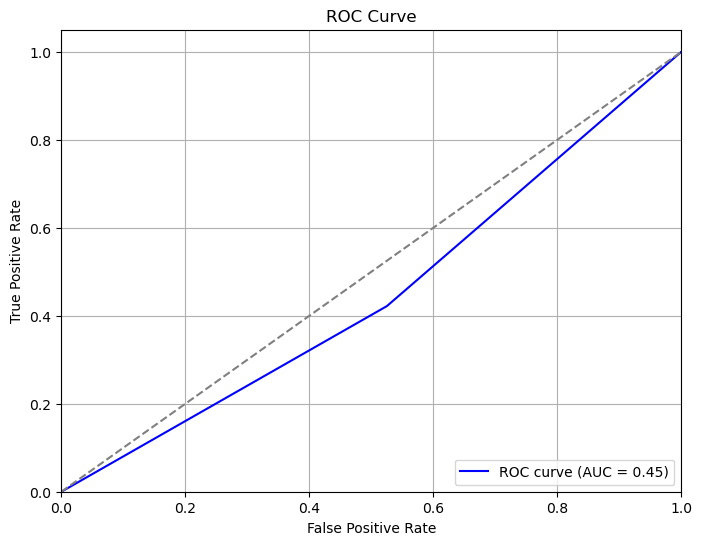

AUC: 0.45


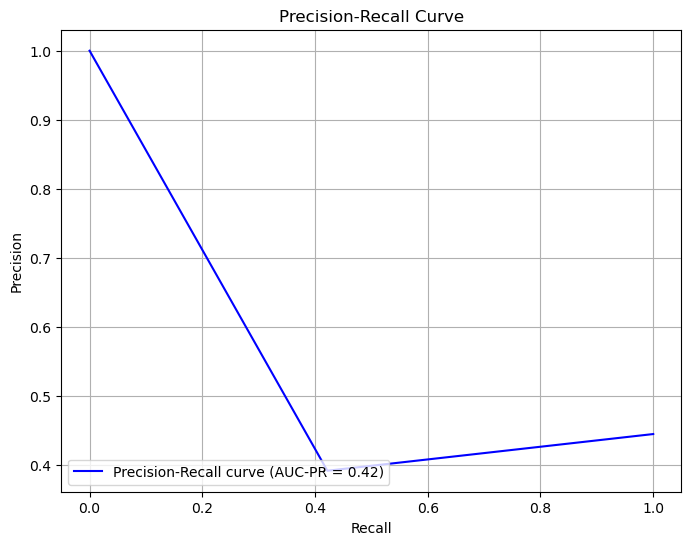

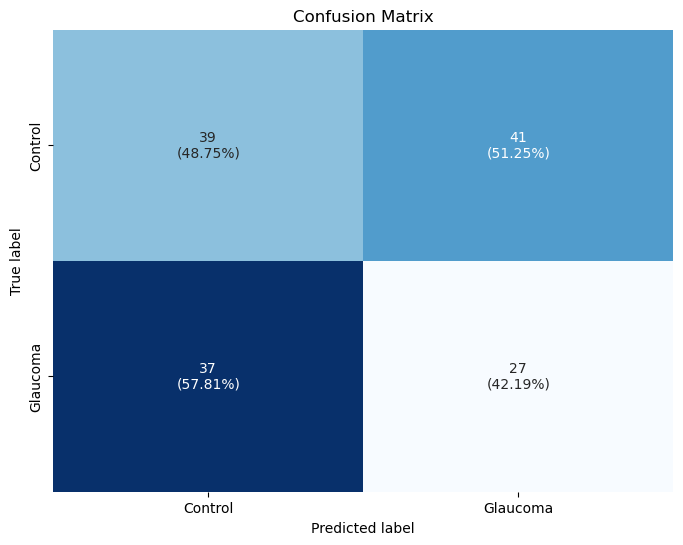

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Obtener las probabilidades de la clase positiva (1) para el conjunto de prueba
y_prob = dummy_pipe.predict_proba(X_test)[:, 1]

# Obtener las predicciones de clase para el conjunto de prueba
y_pred = dummy_pipe.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc_value = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Imprimir el valor del AUC
print(f"AUC: {auc_value:.2f}")

# Calcular la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calcular el AUC-PR
auc_pr = average_precision_score(y_test, y_prob)

# Graficar la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular la matriz de confusión normalizada
conf_matrix_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Crear una anotación que incluya tanto el valor absoluto como el porcentaje
labels = np.asarray([f'{int(conf_matrix[i, j])}\n({conf_matrix_normalized[i, j]:.2%})' 
                     for i in range(conf_matrix.shape[0]) 
                     for j in range(conf_matrix.shape[1])]).reshape(conf_matrix.shape)

# Definir las etiquetas personalizadas
class_names = ['Control', 'Glaucoma']

# Graficar la matriz de confusión con los valores absolutos y normalizados
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Modelos

### XGboost

In [366]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_recall_curve, confusion_matrix

# Definir el modelo XGBoost
xgb_model = XGBClassifier(learning_rate=0.3, max_depth=6, eval_metric=["error", "logloss"])

# Definir el pipeline con el preprocesador y el modelo XGBoost
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador que creaste anteriormente
    ('classifier', xgb_model)        # Modelo de clasificación XGBoost
])

train_and_evaluate(pipe, X_train, y_train, X_test, y_test, print_=True)


Matriz de confusión: 

[[29 11]
 [16 16]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        40
           1       0.59      0.50      0.54        32

    accuracy                           0.62        72
   macro avg       0.62      0.61      0.61        72
weighted avg       0.62      0.62      0.62        72

Tiempo de entrenamiento: 2.40 segundos


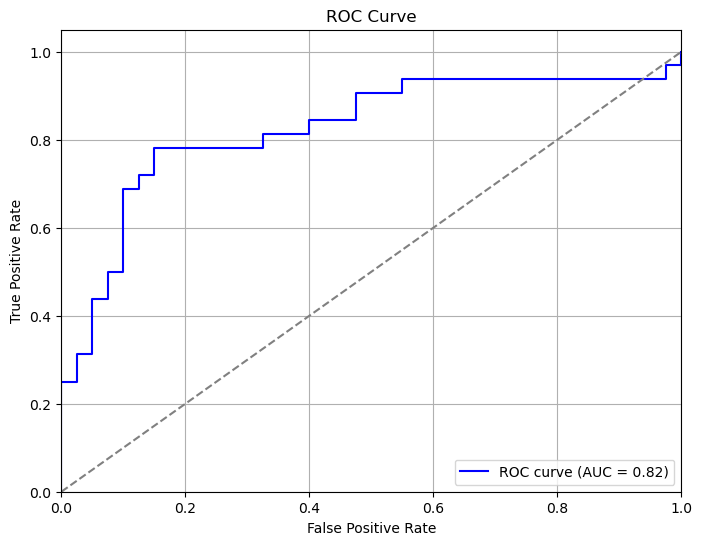

AUC: 0.82


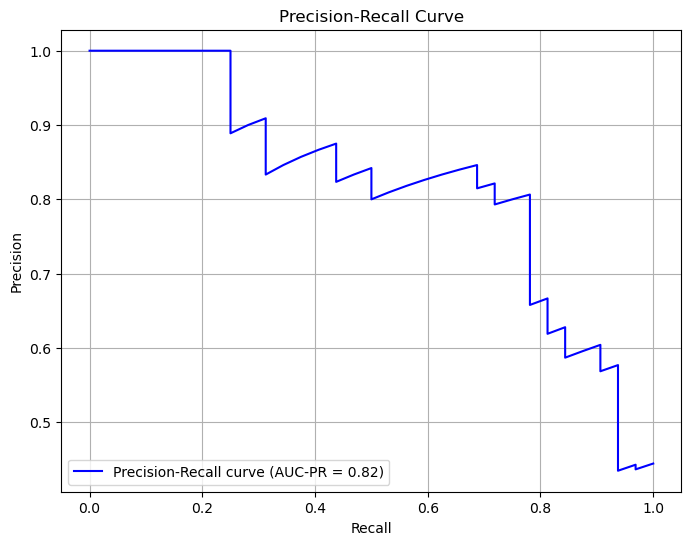

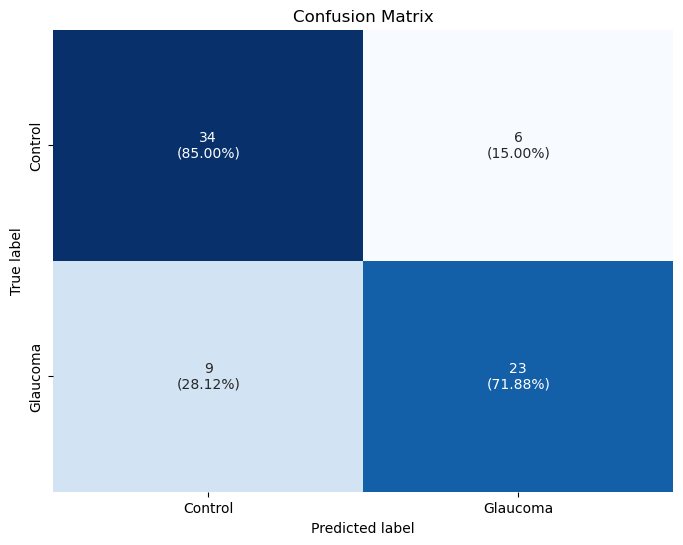

In [435]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ajustar el pipeline al conjunto de entrenamiento
pipe.fit(X_train, y_train)

# Obtener las probabilidades de la clase positiva (1) para el conjunto de prueba
y_prob = pipe.predict_proba(X_test)[:, 1]

# Obtener las predicciones de clase para el conjunto de prueba
y_pred = pipe.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc_value = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Imprimir el valor del AUC
print(f"AUC: {auc_value:.2f}")

# Calcular la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calcular el AUC-PR
auc_pr = average_precision_score(y_test, y_prob)

# Graficar la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular la matriz de confusión normalizada
conf_matrix_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Crear una anotación que incluya tanto el valor absoluto como el porcentaje
labels = np.asarray([f'{int(conf_matrix[i, j])}\n({conf_matrix_normalized[i, j]:.2%})' 
                     for i in range(conf_matrix.shape[0]) 
                     for j in range(conf_matrix.shape[1])]).reshape(conf_matrix.shape)

# Definir las etiquetas personalizadas
class_names = ['Control', 'Glaucoma']

# Graficar la matriz de confusión con los valores absolutos y normalizados
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [325]:
# Definir el modelo XGBoost
xgb_model = XGBClassifier(learning_rate=0.3, max_depth=6, eval_metric=["error", "logloss"])

# Data preprocessing pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transformar los datos
X_train_trans = my_pipeline.fit_transform(X_train)
X_test_trans = my_pipeline.transform(X_test)

# Entrenar el modelo XGBoost usando eval_set para las métricas de entrenamiento y prueba
eval_set = [(X_train_trans, y_train), (X_test_trans, y_test)]
xgb_model.fit(
    X_train_trans, y_train,
    eval_set=eval_set,
    verbose=False
)

# Visualizar el entrenamiento
plot_training(xgb_model, X_test_trans, y_test)

Accuracy: 72.22%


In [72]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir el pipeline con el preprocesador y el modelo XGBoost
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador que creaste anteriormente
    ('classifier', xgb_model)        # Modelo de clasificación XGBoost
])

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Número de árboles
    'classifier__learning_rate': [0.001, 0.01, 0.1],  # Tasa de aprendizaje
    'classifier__max_depth': [3, 5, 10, 25, 50, None],  # Profundidad máxima del árbol
    #'classifier__subsample': [0.8, 1.0],  # Subconjunto de muestras
    #'classifier__colsample_bytree': [0.8, 1.0],  # Subconjunto de características
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
train_and_evaluate(grid_search.best_estimator_, X_train, y_train, X_test, y_test, print_=True)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Matriz de confusión: 

[[20 44]
 [45 35]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.31      0.31      0.31        64
           1       0.44      0.44      0.44        80

    accuracy                           0.38       144
   macro avg       0.38      0.38      0.38       144
weighted avg       0.38      0.38      0.38       144

Tiempo de entrenamiento: 1.26 segundos


In [211]:
# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.61161388 0.48231389 0.69604922 0.60784314 0.45723295]
ROC-AUC por fold: [0.69268477 0.50791855 0.75547866 0.6082276  0.5763168 ]
Exactitud por fold: [0.61165049 0.48543689 0.69607843 0.60784314 0.47058824]
Promedio F1-Score: 0.571010615058577
Promedio Exactitud: 0.5743194365124691


In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los nombres reales de las características después del preprocesamiento
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

def plot_importance(model, feature_names, importance_type='weight', top_n=None):
    """
    Muestra las 'top_n' características más importantes del modelo con los nombres reales.
    
    Parameters:
    - model: El modelo XGBoost entrenado.
    - feature_names: Lista de nombres de las características después del preprocesamiento.
    - importance_type: Tipo de importancia (por defecto es 'weight').
    - top_n: Número de características que deseas mostrar. Si es None, se muestran todas.
    """
    # Obtener las importancias de las características
    importance_dict = model.get_booster().get_score(importance_type=importance_type)

    # Convertir las importancias a un DataFrame para facilitar la visualización
    importance_df = pd.DataFrame({
        'Feature': importance_dict.keys(),
        'Importance': importance_dict.values()
    }).sort_values(by='Importance', ascending=False)

    # Mapear las características codificadas a los nombres reales
    importance_df['Feature'] = importance_df['Feature'].map(lambda x: feature_names[int(x[1:])] if x[1:].isdigit() else x)

    # Seleccionar solo las 'top_n' características si se proporciona
    if top_n:
        importance_df = importance_df.head(top_n)

    # Graficar las importancias
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'Top {top_n} Feature Importances' if top_n else 'Feature Importances')
    plt.gca().invert_yaxis()  # Invertir el eje y para tener la característica más importante en la parte superior
    plt.show()


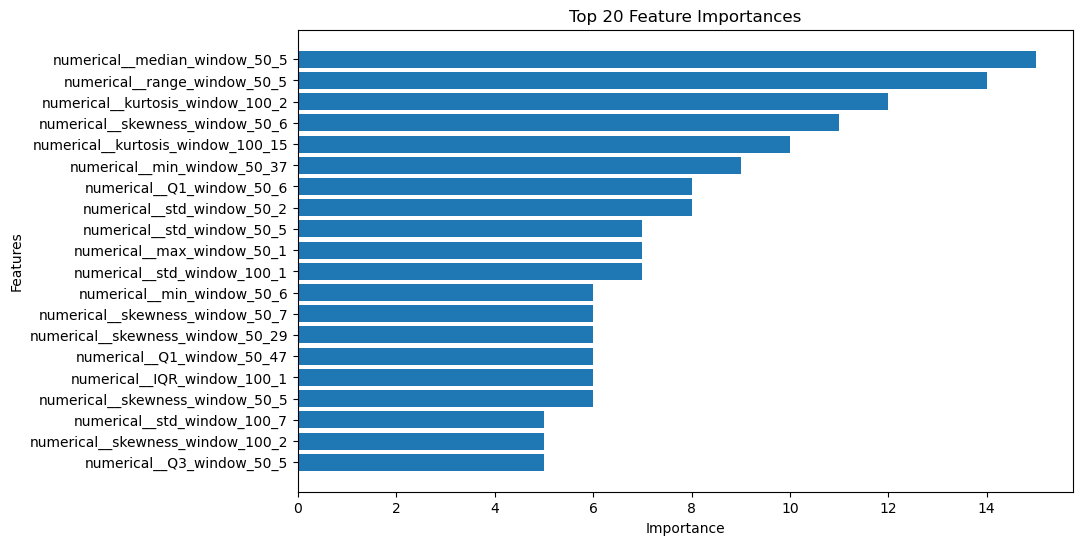

In [125]:
model = pipe.named_steps['classifier']
plot_importance(model, feature_names, importance_type='weight', top_n = 20)

In [130]:
# Obtener las importancias de las características
importance_dict = model.get_booster().get_score(importance_type='weight')

# Convertir las importancias a un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Importance': importance_dict.values()
    }).sort_values(by='Importance', ascending=False)

# Mapear las características codificadas a los nombres reales
importance_df['Feature'] = importance_df['Feature'].map(lambda x: feature_names[int(x[1:])] if x[1:].isdigit() else x)

importance_df.head(10)

,Feature,Importance
27,numerical__median_window_50_5,15.0
30,numerical__range_window_50_5,14.0
253,numerical__kurtosis_window_100_2,12.0
42,numerical__skewness_window_50_6,11.0
298,numerical__kurtosis_window_100_15,10.0
158,numerical__min_window_50_37,9.0
40,numerical__Q1_window_50_6,8.0
10,numerical__std_window_50_2,8.0
26,numerical__std_window_50_5,7.0
6,numerical__max_window_50_1,7.0


### Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
random_forest = RandomForestClassifier(random_state=27)

# Definir el pipeline (puedes agregar más pasos si es necesario)
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador que creaste anteriormente
    ('classifier', random_forest)    # Modelo de clasificación
])

# Entrenar y evaluar
train_and_evaluate(pipe, X_train, y_train, X_test, y_test)

Matriz de confusión: 

[[47 33]
 [30 34]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        80
           1       0.51      0.53      0.52        64

    accuracy                           0.56       144
   macro avg       0.56      0.56      0.56       144
weighted avg       0.56      0.56      0.56       144

Tiempo de entrenamiento: 0.51 segundos


In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Definir el pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', rf_model)         # Modelo RandomForest
])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Número de árboles
    'classifier__max_depth': [10, 20, 30],        # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 5, 10],  # Mínimas muestras para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 4],    # Mínimas muestras en una hoja
    'classifier__bootstrap': [True, False]        # Método de muestreo
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
train_and_evaluate(grid_search.best_estimator_, X_train, y_train, X_test, y_test, print_=True)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros encontrados:
{'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Matriz de confusión: 

[[17 47]
 [52 28]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.25      0.27      0.26        64
           1       0.37      0.35      0.36        80

    accuracy                           0.31       144
   macro avg       0.31      0.31      0.31       144
weighted avg       0.32      0.31      0.31       144

Tiempo de entrenamiento: 0.43 segundos


In [179]:
# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.66736322 0.5238829  0.64487427 0.50676983 0.49404762]
ROC-AUC por fold: [0.72963801 0.50131976 0.76009227 0.54459823 0.58304498]
Exactitud por fold: [0.66990291 0.53398058 0.64705882 0.50980392 0.50980392]
Promedio F1-Score: 0.5673875676553283
Promedio Exactitud: 0.5741100323624595


### SVM

In [213]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definir el modelo
svm_model = SVC(probability=True, random_state=42)

pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', svm_model)        # Modelo SVM
])

# Entrenar y evaluar
train_and_evaluate(pipe, X_train, y_train, X_test, y_test)

Matriz de confusión: 

[[48 32]
 [31 33]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.61      0.60      0.60        80
           1       0.51      0.52      0.51        64

    accuracy                           0.56       144
   macro avg       0.56      0.56      0.56       144
weighted avg       0.56      0.56      0.56       144

Tiempo de entrenamiento: 0.12 segundos


In [181]:
# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.73697153 0.50014273 0.6619883  0.43137255 0.3980464 ]
ROC-AUC por fold: [0.79487179 0.50452489 0.73010381 0.43675509 0.544406  ]
Exactitud por fold: [0.73786408 0.50485437 0.66666667 0.43137255 0.43137255]
Promedio F1-Score: 0.5457043034434368
Promedio Exactitud: 0.5544260422615649


In [89]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definir el modelo SVC
svm_model = SVC(probability=True, random_state=42)

# Definir el pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', svm_model)        # Modelo SVM
])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],          # Parámetro de regularización
    'classifier__kernel': ['linear', 'rbf'],     # Tipo de kernel
    'classifier__gamma': ['scale', 'auto'],      # Parámetro del kernel RBF
    'classifier__degree': [2, 3, 4]              # Solo si se usa kernel polinómico
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
train_and_evaluate(grid_search.best_estimator_, X_train, y_train, X_test, y_test, print_=True)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros encontrados:
{'classifier__C': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Matriz de confusión: 

[[27 37]
 [54 26]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.33      0.42      0.37        64
           1       0.41      0.33      0.36        80

    accuracy                           0.37       144
   macro avg       0.37      0.37      0.37       144
weighted avg       0.38      0.37      0.37       144

Tiempo de entrenamiento: 0.23 segundos
